# **Decision Trees**  
V.01  
Patient Classification and Medication Prediction

>In this exercise we will use Decision Tree classification algorithm to build a model from historical data of patients, and their response to different medications. Then we will use the trained decision tree to predict the class of an unknown patient or to find a proper drug for a new patient.

#### Problem
We have a datset of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. We have to build a model to find out which drug might be appropriate for a future patient with the same illness.

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### Loading the Dataset

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path) 

#### Exploring the Dataset

In [3]:
df.head(4) 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#### Feature Selection
Declaring the X and Y variable  
X as feature matrix / independent  
Y as target variable / response vector / dependent

In [6]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
Y = df[['Drug']] 

#### Convert Categorical Variables
Some of the features in X dataset are categorical, sklearn decision trees do not handle categorical variables. We can convert these features into numerical values.

In [7]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder() 
le_sex.fit(['F', 'M']) 
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder() 
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])  
X[:,2] = le_BP.transform(X[:,2]) 

le_Chol = preprocessing.LabelEncoder() 
le_Chol.fit(['NORMAL', 'HIGH'])  
X[:,3] = le_Chol.transform(X[:,3]) 

In [8]:
X[0:5] 

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

#### Splitting Data
Let's use **train_test_split** in decision tree.  
**train_test_split** will return 4 different parameters. We will name them -- trainX, testX, trainY, testY  
test_size represents the ratio of testing dataset, random_state ensures we obtain the same splits

In [9]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=3) 

In [10]:
trainX.shape

(140, 5)

In [11]:
testX.shape

(60, 5)

#### Builiding Decision Tree Model
Create decision tree classifier object *drugTree*  
Fit the trainX and trainY in object  
Create prediction object *predTree* of testX dataset

In [12]:
drugTree = DecisionTreeClassifier() 

In [13]:
drugTree.fit(trainX, trainY) 

DecisionTreeClassifier()

In [14]:
predTree = drugTree.predict(testX) 

In [15]:
predTree[0:5] 

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

#### Evaluation
Let's check the accuracy of the model

In [16]:
from sklearn import metrics

In [17]:
import matplotlib.pyplot as plt

In [26]:
print('Accuracy Rate: %.2f' % metrics.accuracy_score(testY, predTree)) 

Accuracy Rate: 0.98


#### Visualization

In [27]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

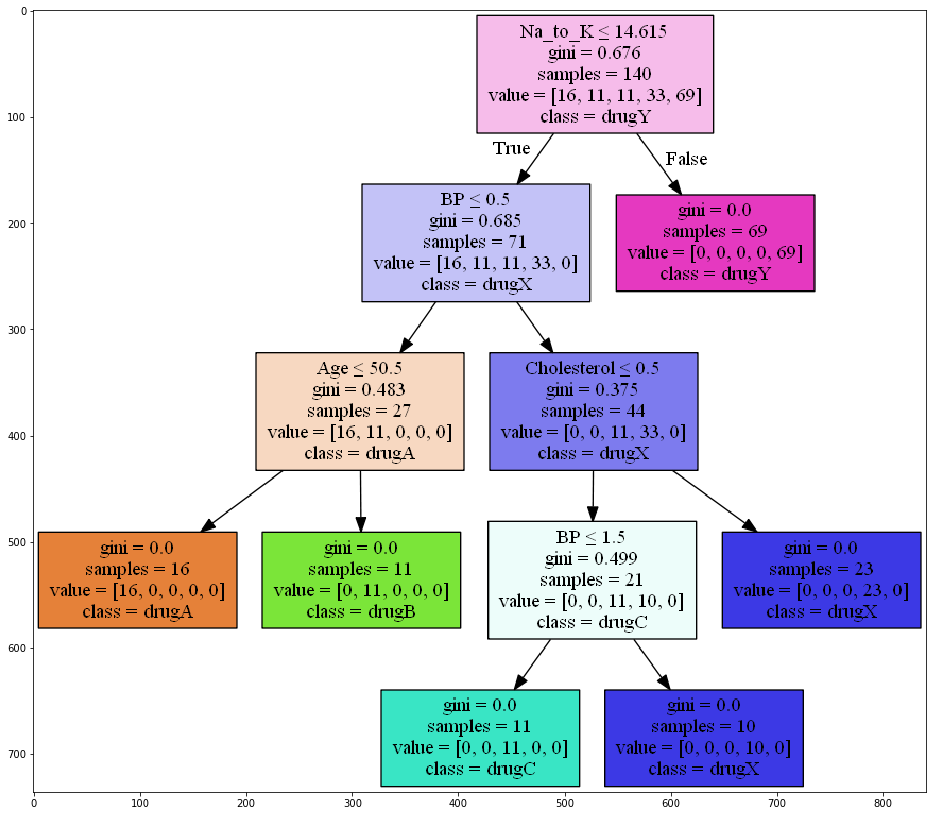

In [28]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(trainY), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(16, 16))
plt.imshow(img,interpolation='nearest') 